In [1]:
# Imports
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import datetime as dt
import requests

In [2]:
# render plot graphics in less massive way
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [3]:
# comment out and see the warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Ooh, nice. Can load data over http as easily as from CSV

In [4]:
API_URL = 'https://api.iextrading.com/1.0'
STOCK = 'ALL' # stock symbol

In [5]:
res = requests.get(f'{API_URL}/stock/{STOCK}/chart/5y')
data = res.json()
df = pd.DataFrame(data)

# sklearn deals with dates a little differently
# so let's convert the dates to timestamps
df['date'] = df['date'].apply((lambda x: pd.Timestamp(x)))

In [6]:
# similar to df[:3]
df.head(3)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,-0.109304,0.000000,-0.216,50.5442,2014-03-12,50.6990,"Mar 12, 14",50.2163,50.4440,2210355,2210355,50.5265
1,-0.346129,-0.006849,-0.685,50.1980,2014-03-13,50.7446,"Mar 13, 14",50.1616,50.6717,2762507,2762507,47.0873
2,0.018217,-0.006487,0.036,50.2163,2014-03-14,50.4440,"Mar 14, 14",50.1479,50.1525,2695252,2695252,50.4374


In [7]:
# what kind of goodies here?
#df.describe()

In [38]:
# or here?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
change              1258 non-null float64
changeOverTime      1258 non-null float64
changePercent       1258 non-null float64
close               1258 non-null float64
date                1258 non-null datetime64[ns]
high                1258 non-null float64
label               1258 non-null object
low                 1258 non-null float64
open                1258 non-null float64
unadjustedVolume    1258 non-null int64
volume              1258 non-null int64
vwap                1258 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 118.0+ KB


In [9]:
# generate/store test and train data
X_train, X_test, Y_train, Y_test = train_test_split(df['date'], df['close'], test_size = 0.3, random_state=42)

Plot out the training data

Text(0.5, 1.0, 'Training set')

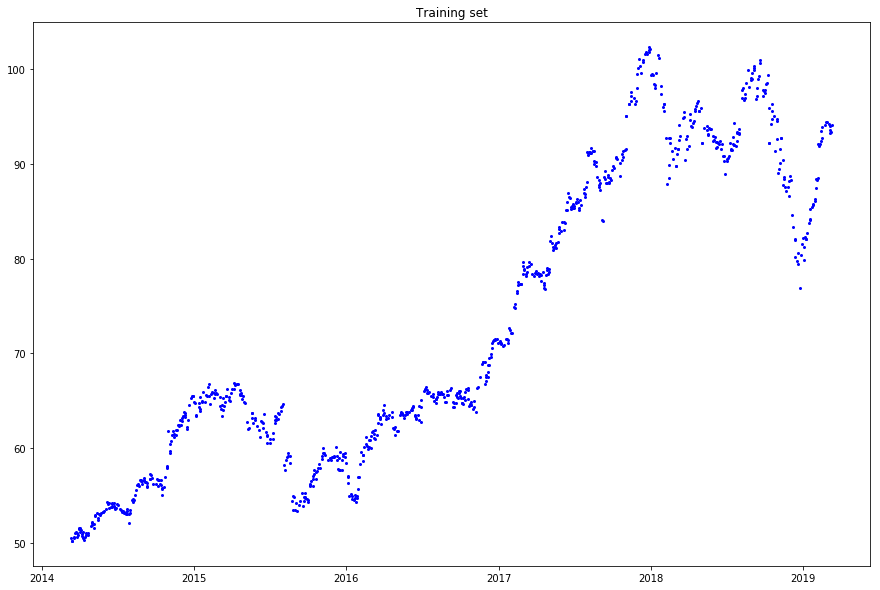

In [10]:
plt.figure(figsize=(15,10))
plt.plot(X_train, Y_train, 'bo', markersize=2) #bo is blue circle
plt.title('Training set')


## Now plot out the test data

Text(0.5, 1.0, 'Test set')

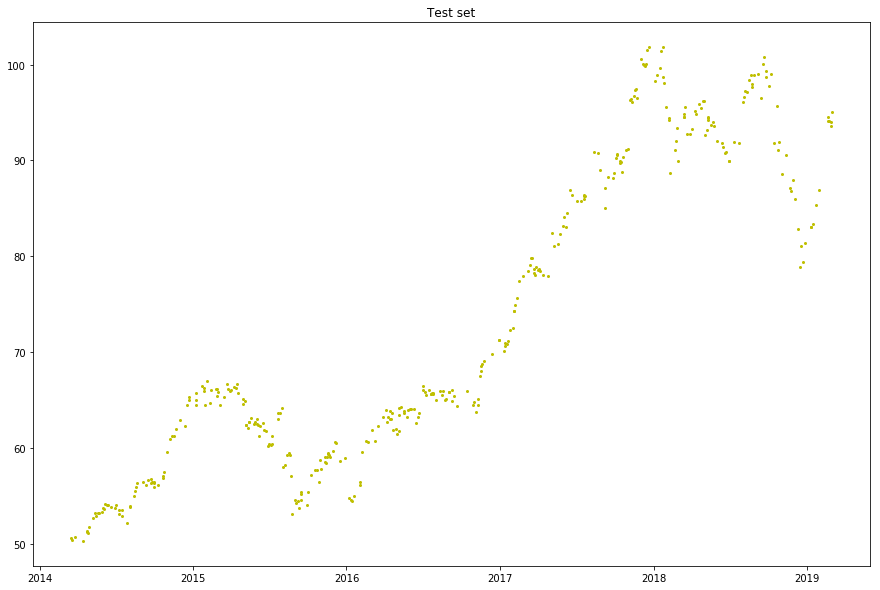

In [11]:
plt.figure(figsize=(15,10))
plt.plot(X_test, Y_test, 'yo', markersize=2)
plt.title('Test set')

In [34]:
# turns datetime values from x_train to ints representing year only
X_years = [matplotlib.dates.date2num(x) for x in X_train]

coefs_lin = poly.polyfit(X_years, Y_train, 1)
coefs_sq = poly.polyfit(X_years, Y_train, 2)
coefs_ten = poly.polyfit(X_years, Y_train, 3)


In [35]:
# yet another date tweak to determine dimensions of horizontal line
X_line = np.linspace(matplotlib.dates.date2num(X_train.min()), matplotlib.dates.date2num(X_train.max()), 100000)

In [36]:
ffit_ln = poly.polyval(X_line, coefs_lin)
ffit_sq = poly.polyval(X_line, coefs_sq)
ffit_ten = poly.polyval(X_line, coefs_ten)

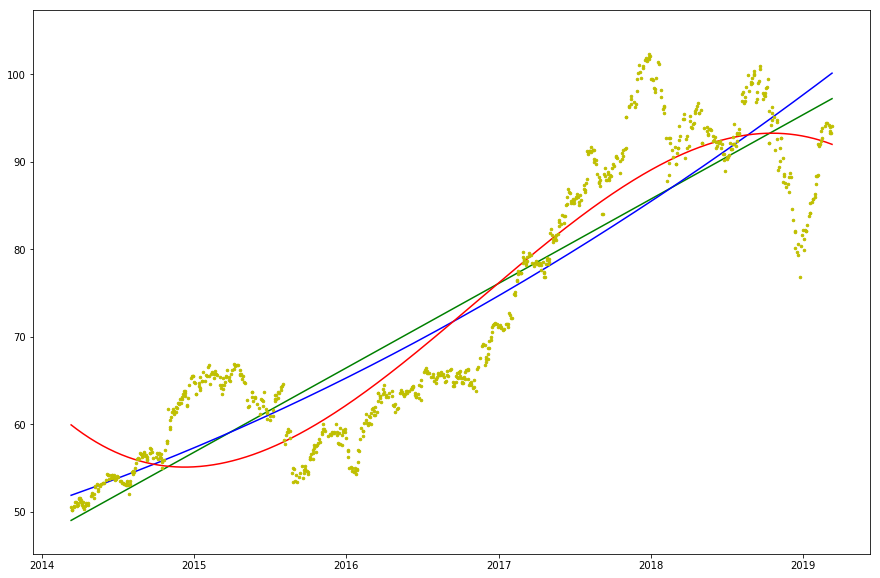

In [37]:
plt.figure(figsize=(15,10))
plt.ylim(min(Y_train - 5), max(Y_train + 5))
plt.plot(X_line, ffit_ln, 'g')
plt.plot(X_line, ffit_sq, 'b')
plt.plot(X_line, ffit_ten, 'r')

# see what happens with y vs y.
plt.plot(X_train, Y_train, 'y.', markersize=5)